In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

Prior code from mva:

In [5]:
def read_xy(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df


def read_all(load_dir: str):
    paths = glob(f'{load_dir}/*.csv')
    return [read_xy(path) for path in paths]

In [7]:
def stick_prob_from_load_dir(load_dir: str):
    return float(Path(load_dir).name)

In [10]:
def read_sp_dir(load_dir: str):
    return stick_prob_from_load_dir(load_dir), read_all(load_dir)

In [15]:
p, dfs = read_sp_dir('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability/0.6')

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

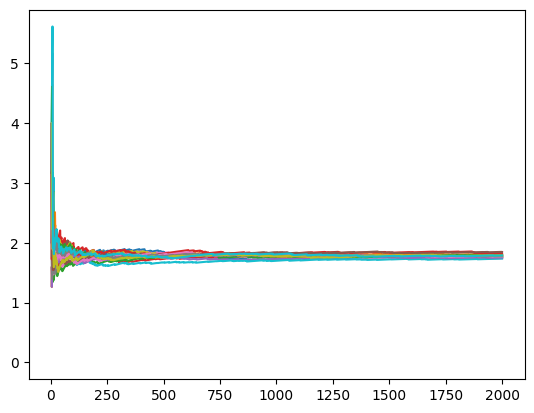

In [16]:
for df in dfs:
    plt.plot(df.N, df.fd)

plt.show()

In [19]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None


def mean_of_tail(series, tol=0.05):
    tail_index = convergent_tail_index(series, tol)
    return np.mean(series[tail_index:])

In [22]:
def fd_of_dfs(dfs):
    fds = [mean_of_tail(df.fd, 0.001) for df in dfs]
    fds_clean = [f for f in fds if f < np.inf]
    return np.mean(fds_clean)

In [26]:
a = [read_sp_dir(load_dir) for load_dir in glob('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability/*')]

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [42]:
aa = a.sort(key = lambda p: p[0])
b = [fd_of_dfs(dfs) for (p, dfs) in aa]
ps = [p for (p, dfs) in aa]
b

TypeError: 'NoneType' object is not iterable

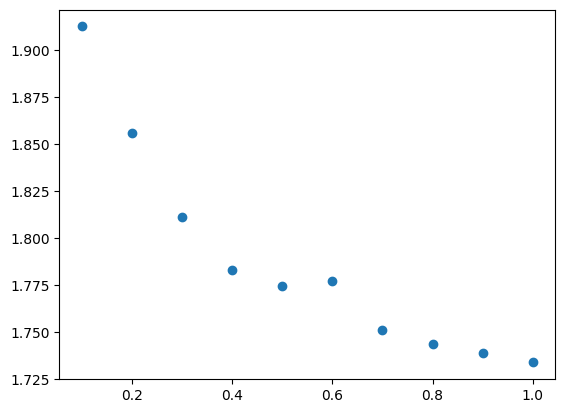

In [47]:
plt.scatter(ps, b)

In [46]:
a

[(0.1,
  [       x   y     N          r         cr        fd
   0      0   0     1   0.000000   0.000000 -0.000000
   1     -1   0     2   1.000000   1.000000       inf
   2      1   0     3   1.000000   1.000000       inf
   3      1   1     4   1.414214   1.414214  4.000000
   4      0  -1     5   1.000000   1.414214  4.643856
   ...   ..  ..   ...        ...        ...       ...
   1995 -32 -20  1996  37.735925  52.497619  1.918542
   1996 -33 -22  1997  39.661064  52.497619  1.918669
   1997 -17 -31  1998  35.355339  52.497619  1.918795
   1998 -16  36  1999  39.395431  52.497619  1.918921
   1999  46   7  2000  46.529560  52.497619  1.919048
   
   [2000 rows x 6 columns],
          x   y     N          r         cr        fd
   0      0   0     1   0.000000   0.000000 -0.000000
   1      0   1     2   1.000000   1.000000       inf
   2      0  -1     3   1.000000   1.000000       inf
   3      0  -2     4   2.000000   2.000000  2.000000
   4     -1   1     5   1.414214   2.000000